In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

### LOAD DATA

- In the received dataset, there are two files: 'churn-bigml-80.csv' and 'churn-bigml-20.csv'.
- Both containing the 'Churn' output.
- However, to objectively evaluate the model after building it, I will use the file 'churn-bigml-20.csv' as the test file and only use the file 'churn-bigml-80.csv' to train the machine learning model.

In [2]:
train_df = pd.read_csv("D:\\readfile\\churn-bigml-80.csv")

# train_df_1 = pd.read_csv("D:\\readfile\\churn-bigml-80.csv")

train_df_2 = pd.read_csv("D:\\readfile\\churn-bigml-20.csv")

In [3]:
# # Merge the two dataframes
# combined_df = pd.concat([train_df_1, train_df_2])

# # Save the merged dataframe into a new CSV file
# combined_df.to_csv('churn-bigml-100.csv', index=False)
# # "Combined file" has the same folder with code file

In [4]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
### SCALE DATA

In [6]:
# # Identify numeric columns
# numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# # Identify non-numeric columns
# non_numeric_columns = train_df.select_dtypes(exclude=['float64', 'int64']).columns

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform only the numeric columns
# scaled_data = scaler.fit_transform(train_df[numeric_columns])

# # Convert the scaled data back into a dataframe
# scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# # Concatenate the scaled numeric columns with the non-numeric columns
# final_df = pd.concat([scaled_df, train_df[non_numeric_columns].reset_index(drop=True)], axis=1)

# final_df


### DESCRIPTIVE STATISTICS

In [7]:
train_df.describe().T.style.background_gradient(axis = 1, cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Account length,2666.000000,100.620405,39.563974,1.000000,73.000000,100.000000,127.000000,243.000000
Area code,2666.000000,437.438860,42.521018,408.000000,408.000000,415.000000,510.000000,510.000000
Number vmail messages,2666.000000,8.021755,13.612277,0.000000,0.000000,0.000000,19.000000,50.000000
Total day minutes,2666.000000,179.481620,54.210350,0.000000,143.400000,179.950000,215.900000,350.800000
Total day calls,2666.000000,100.310203,19.988162,0.000000,87.000000,101.000000,114.000000,160.000000
Total day charge,2666.000000,30.512404,9.215733,0.000000,24.380000,30.590000,36.700000,59.640000
Total eve minutes,2666.000000,200.386159,50.951515,0.000000,165.300000,200.900000,235.100000,363.700000
Total eve calls,2666.000000,100.023631,20.161445,0.000000,87.000000,100.000000,114.000000,170.000000
Total eve charge,2666.000000,17.033072,4.330864,0.000000,14.050000,17.080000,19.980000,30.910000
Total night minutes,2666.000000,201.168942,50.780323,43.700000,166.925000,201.150000,236.475000,395.000000


In [8]:
# Checking the missing values 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

### => have no missing value

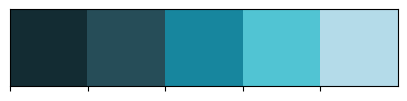

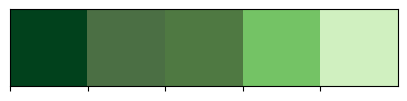

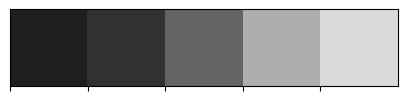

In [9]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

Text(0.5, 1.0, 'Percentage of churn and not churn')

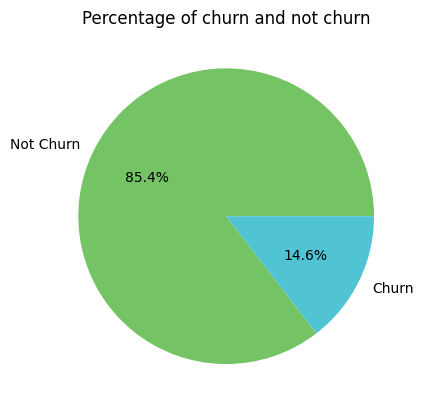

In [10]:
x_0 = train_df.loc[train_df['Churn'] == 0].shape[0]
x_1 = train_df.loc[train_df['Churn'] == 1].shape[0]
plt.pie(np.array([x_0,x_1]),labels=['Not Churn','Churn'],colors=[colors_green[3], colors_blue[3]],autopct='%1.1f%%')
plt.color_discrete_sequence=[colors_green[3], colors_blue[3]]
plt.title('Percentage of churn and not churn')

### BOXPLOT

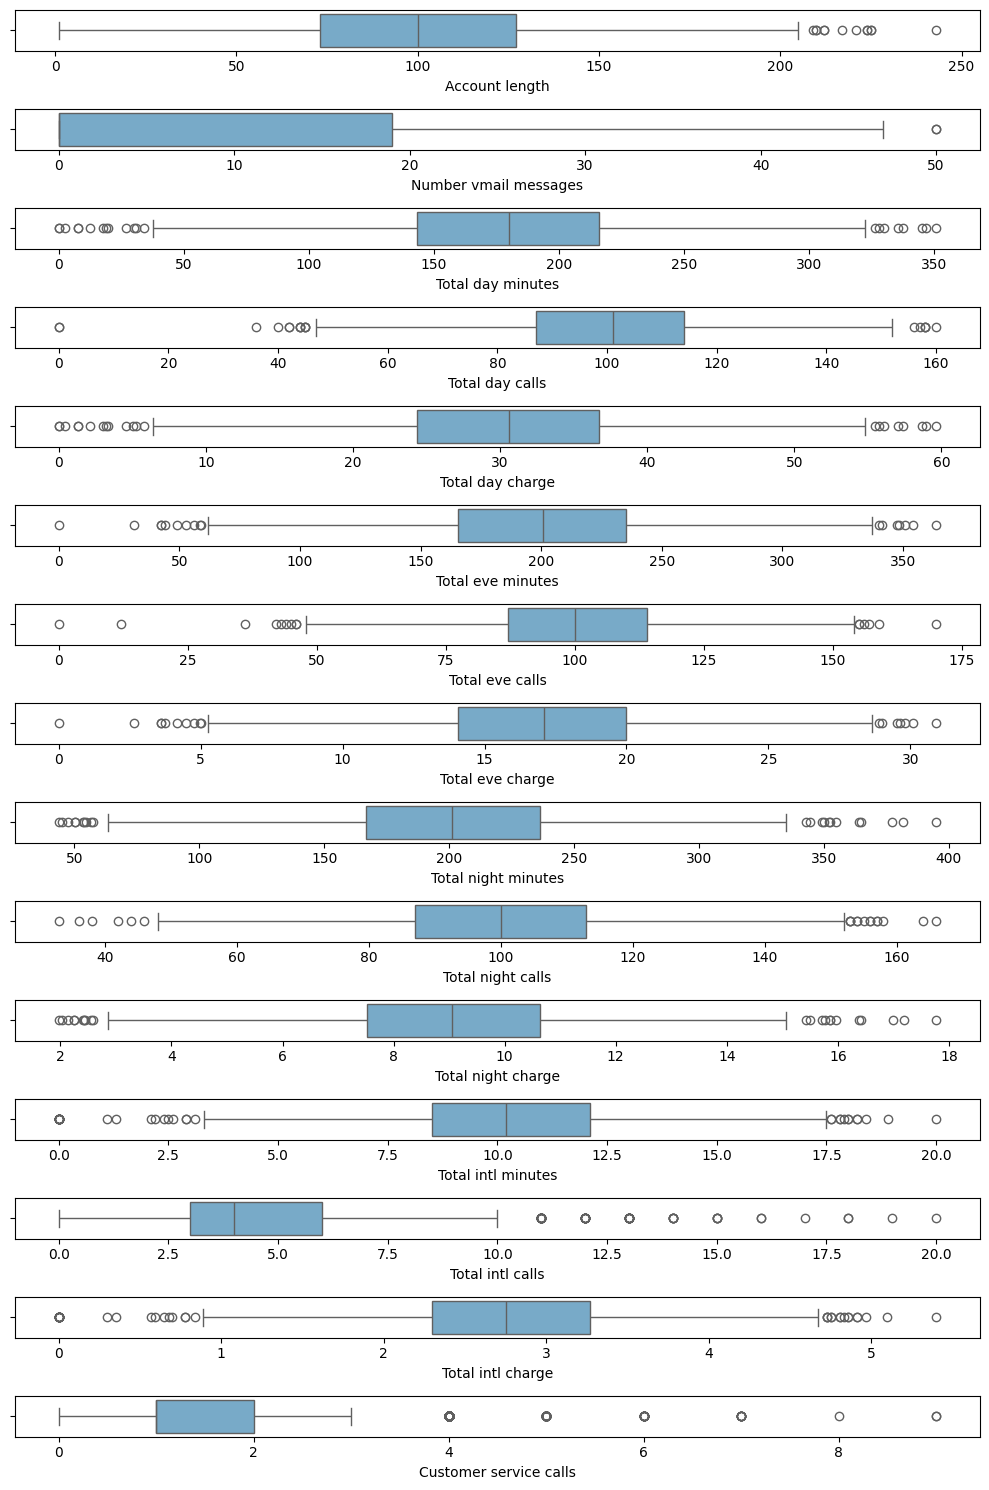

In [11]:
num_var = ['Account length','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
n_rows = 15
n_cols = 1

fig,ax = plt.subplots(n_rows,n_cols,figsize=(10,15))
for c in range(n_rows):  
    ax_i = ax[c]
    sns.boxplot(data=train_df,x=train_df[num_var[c]],palette='Blues',ax=ax_i,)
plt.tight_layout()

### DEALING WITH OUTLIERS

In [12]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

# Find max and min value of the boxplot
def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

# Bring outlier data to the max or min value of the boxplot
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

### CATEGORICAL VARIABLES

In [13]:
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [14]:
# extract the categorical variables
cat_var = ['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

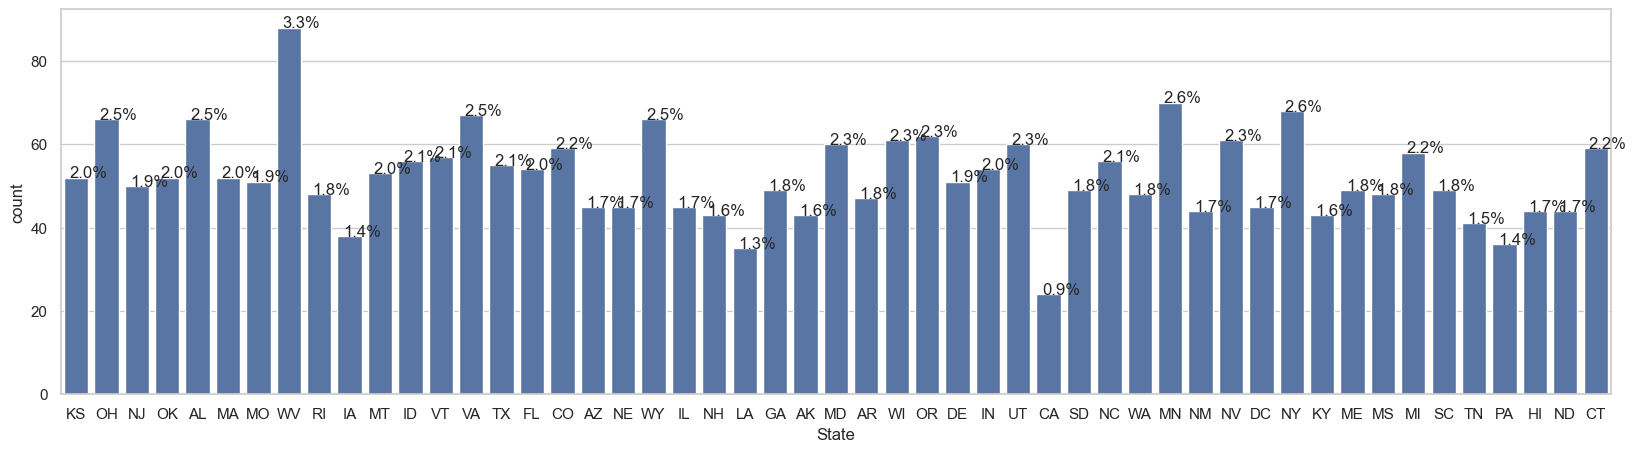

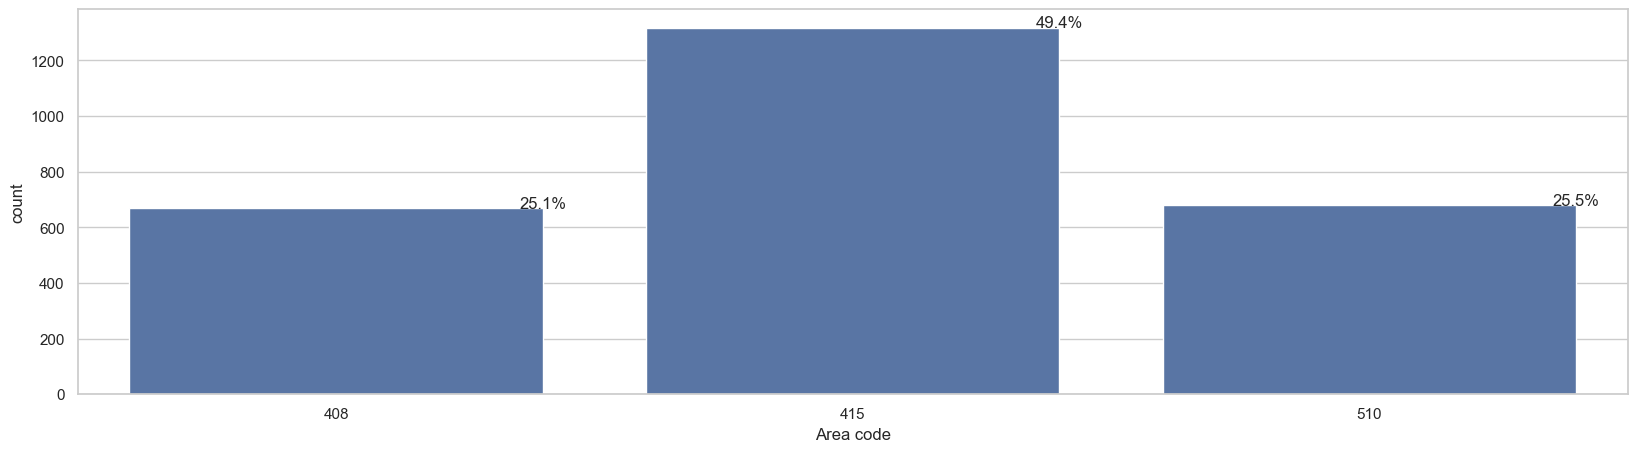

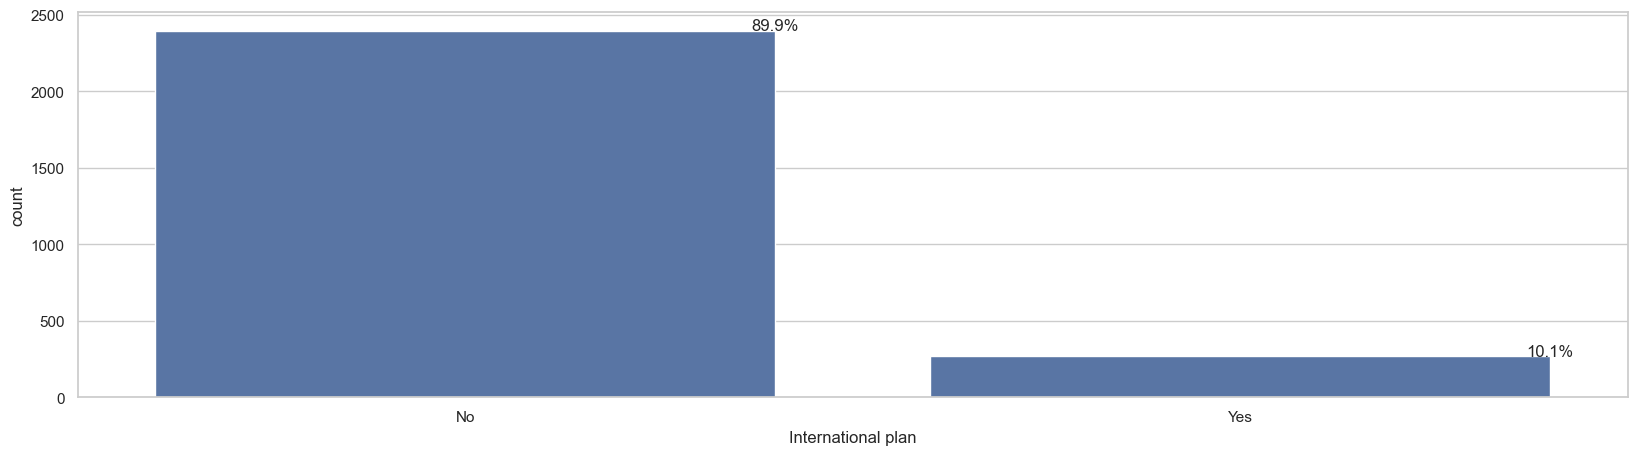

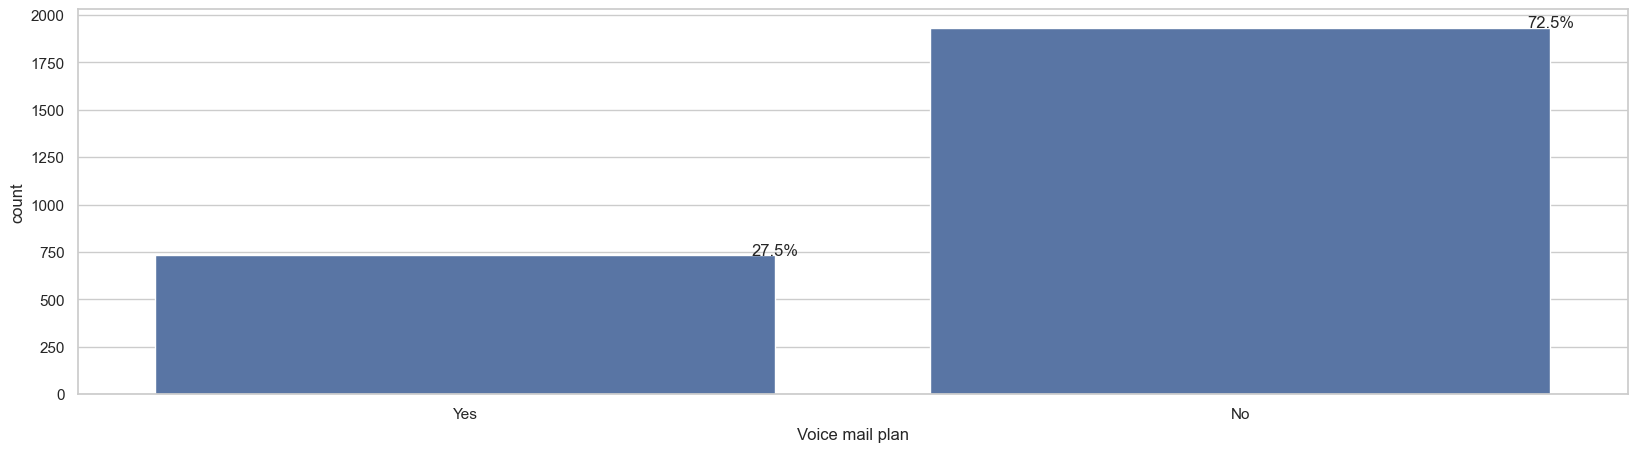

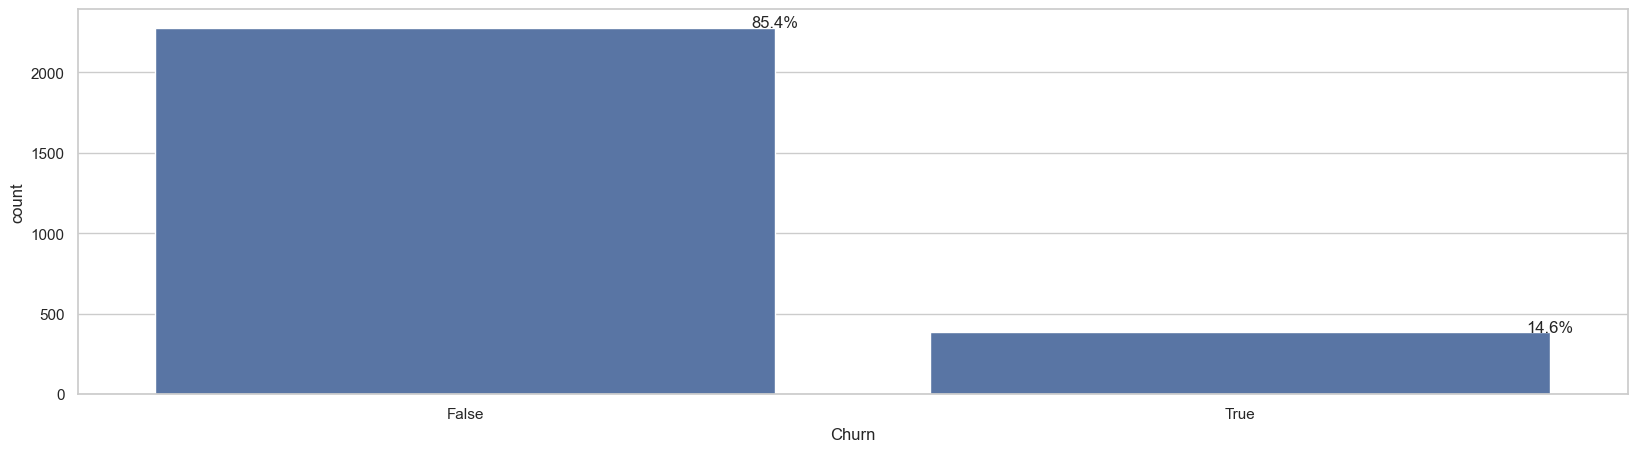

In [15]:
#display the all the categorical variable
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(train_df)
    ax = sns.countplot(x = train_df[feature], data = train_df)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

- 90% customers didn't have International plan
- 72.5% customers didn't have Voice mail plan
- 49.4% customers are living in the Area code 415.
- 25.1% customers are living in the Area code 408
- 14.6% customers churned

OUTLIERS

In [16]:
features_cols = ['Account length','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
for col in features_cols:
    train_df[col] = BoxplotOutlierClipper().fit_transform(train_df[col])

In [17]:
train_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.569392,437.438860,8.019880,179.533777,100.351838,30.521279,200.424944,100.053451,17.036363,201.121568,100.102026,9.050554,10.254276,4.411478,2.769220,1.477869
std,39.412790,42.521018,13.606662,53.835098,19.791118,9.151706,50.681362,19.996183,4.307806,50.380308,19.298896,2.267025,2.715774,2.262104,0.733013,1.105791
min,1.000000,408.000000,0.000000,34.650000,46.500000,5.900000,60.600000,46.500000,5.155000,62.600000,48.000000,2.821250,3.100000,0.000000,0.845000,0.000000
25%,73.000000,408.000000,0.000000,143.400000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.950000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.900000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,208.000000,510.000000,47.500000,324.650000,154.500000,55.180000,339.800000,154.500000,28.875000,340.800000,152.000000,15.331250,17.500000,10.500000,4.725000,3.500000


### BOXPLOT AFTER DEALING WITH OUTLIERS

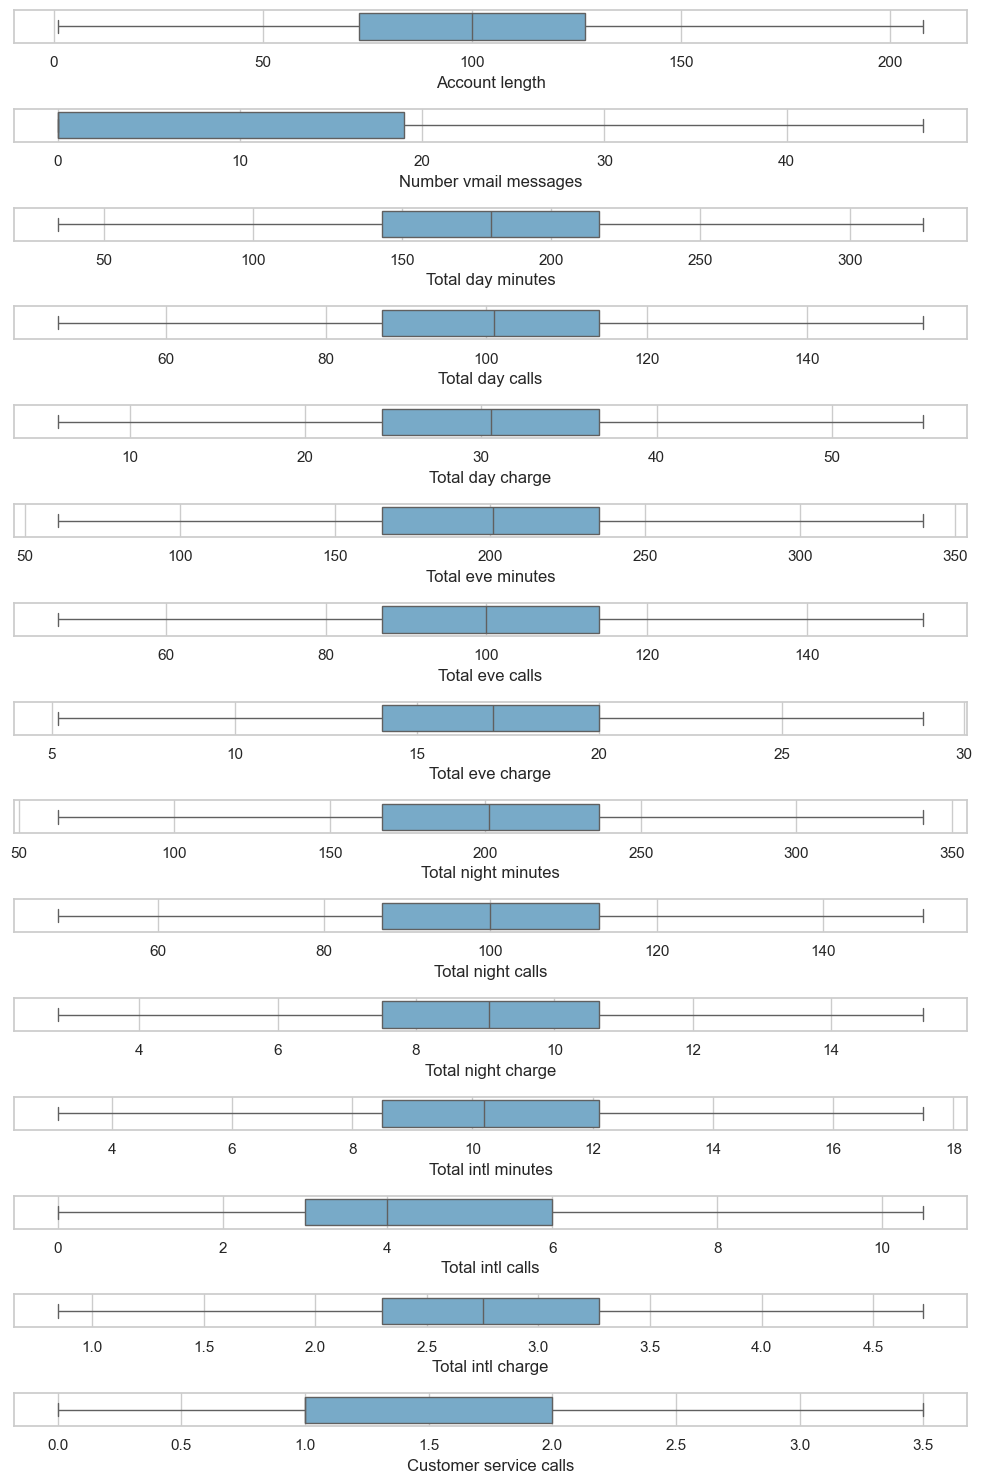

In [18]:
num_var = ['Account length','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
n_rows = 15
n_cols = 1

fig,ax = plt.subplots(n_rows,n_cols,figsize=(10,15))
for c in range(n_rows):  
    ax_i = ax[c]
    sns.boxplot(data=train_df,x=train_df[num_var[c]],palette='Blues',ax=ax_i,)
plt.tight_layout()

### Handling the Categorical Variable

- Converting the "Area code" to numerical variable using one-hot encoder

In [19]:
# converting the Area code to numerical variable using one-hot encoder
from sklearn.preprocessing import OneHotEncoder
onehot_area = OneHotEncoder()
onehot_area.fit(train_df[['Area code']])

# Train_df
encoded_values = onehot_area.transform(train_df[['Area code']])
train_df[onehot_area.categories_[0]] = encoded_values.toarray()
train_df = train_df.drop('Area code', axis=1)

# Train_df_2
encoded_values = onehot_area.transform(train_df_2[['Area code']])
train_df_2[onehot_area.categories_[0]] = encoded_values.toarray()
train_df_2 = train_df_2.drop('Area code', axis=1)

In [20]:
print(train_df['Churn'].dtype)

bool


state feature has 51 different category so I can't converted into onehot encoder that is it create 51 different features so it leads to overfitting so I will use the hashing encoding for state featuer

In [21]:
import category_encoders as ce
def Convert_HashingEncoder(train):
    hash_state = ce.HashingEncoder(cols = 'State')
    train = hash_state.fit_transform(train)
    return train
def Convert_String(train):
    train['International plan'] = train['International plan'].map({'No': 0, 'Yes': 1})
    train['Voice mail plan'] = train['Voice mail plan'].map({'No': 0, 'Yes': 1})
    train['Churn'] = train['Churn'].astype(str).map({'False': 0, 'True': 1})
    return train

In [22]:
train_df = Convert_String(train_df)
train = train_df.copy()
train_df = Convert_HashingEncoder(train_df)

In [23]:
train_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,408,415,510
0,0,1,0,0,0,0,0,0,128,0,...,91,11.01,10.0,3.0,2.70,1.0,0,0.0,1.0,0.0
1,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3.0,3.70,1.0,0,0.0,1.0,0.0
2,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5.0,3.29,0.0,0,0.0,1.0,0.0
3,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7.0,1.78,2.0,0,1.0,0.0,0.0
4,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3.0,2.73,3.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,0,0,1,0,0,79,0,...,128,9.96,11.8,5.0,3.19,2.0,0,0.0,1.0,0.0
2662,0,0,0,0,0,0,1,0,192,0,...,83,12.56,9.9,6.0,2.67,2.0,0,0.0,1.0,0.0
2663,0,0,0,0,0,0,1,0,68,0,...,123,8.61,9.6,4.0,2.59,3.0,0,0.0,1.0,0.0
2664,0,0,1,0,0,0,0,0,28,0,...,91,8.64,14.1,6.0,3.81,2.0,0,0.0,0.0,1.0


In [24]:
train_df.rename(columns={408: 'Area code 408', 415: 'Area code 415', 510: 'Area code 510'}, inplace=True)

In [25]:
train_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code 408,Area code 415,Area code 510
0,0,1,0,0,0,0,0,0,128,0,...,91,11.01,10.0,3.0,2.70,1.0,0,0.0,1.0,0.0
1,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3.0,3.70,1.0,0,0.0,1.0,0.0
2,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5.0,3.29,0.0,0,0.0,1.0,0.0
3,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7.0,1.78,2.0,0,1.0,0.0,0.0
4,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3.0,2.73,3.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,0,0,1,0,0,79,0,...,128,9.96,11.8,5.0,3.19,2.0,0,0.0,1.0,0.0
2662,0,0,0,0,0,0,1,0,192,0,...,83,12.56,9.9,6.0,2.67,2.0,0,0.0,1.0,0.0
2663,0,0,0,0,0,0,1,0,68,0,...,123,8.61,9.6,4.0,2.59,3.0,0,0.0,1.0,0.0
2664,0,0,1,0,0,0,0,0,28,0,...,91,8.64,14.1,6.0,3.81,2.0,0,0.0,0.0,1.0


### K-FOLD

In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from category_encoders import HashingEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

In [27]:
X = train_df.drop(columns = ['Churn'])
y = train_df['Churn']

In [28]:
seed = 42
models = [
    SVC(random_state = 42),
    KNeighborsClassifier(metric='minkowski',p=2),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed),
    XGBClassifier(use_label_encoder = False,eval_metric = 'logloss',random_state = seed),
    LogisticRegression(random_state = seed)
]

In [29]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_results = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kf)
        for fold_idx,score in enumerate(scores):
                entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns = ['model_name','fold_id','accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y = 'accuracy_score', data = cv_df,color = 'lightblue', showmeans = True)
        plt.title('Boxplot of Baseline')
        plt.xticks(rotation=45)

    mean=cv_df.groupby('model_name')['accuracy_score'].mean()
    std=cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results=pd.concat([mean,std],axis=1,ignore_index=True)
    baseline_results.columns=['Mean','Standard Deviation']

    baseline_results.sort_values(by=['Mean'],ascending=False,inplace=True)
    return baseline_results
        
generate_baseline_results(models,X, y, metrics = 'accuracy', cv=5, plot_results = False)

,Mean,Standard Deviation
model_name,,
XGBClassifier,0.957242,0.009113
RandomForestClassifier,0.951617,0.010364
DecisionTreeClassifier,0.914853,0.005075
KNeighborsClassifier,0.872469,0.010340
SVC,0.854465,0.018639
LogisticRegression,0.851463,0.014368


- RandomForestClassifier, XGBClassifier, and DecisionTreeClassifier have the highest average ACC

In [30]:
train_df_2 = Convert_String(train_df_2)
train_df_2 = Convert_HashingEncoder(train_df_2)
train_df_2.rename(columns={408: 'Area code 408', 415: 'Area code 415', 510: 'Area code 510'}, inplace=True)
train_df_2

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code 408,Area code 415,Area code 510
0,0,1,0,0,0,0,0,0,117,0,...,90,9.71,8.7,4,2.35,1,0,1.0,0.0,0.0
1,0,0,0,1,0,0,0,0,65,0,...,111,9.40,12.7,6,3.43,4,1,0.0,1.0,0.0
2,1,0,0,0,0,0,0,0,161,0,...,128,7.23,5.4,9,1.46,4,1,0.0,1.0,0.0
3,0,0,0,0,0,1,0,0,111,0,...,105,8.53,7.7,6,2.08,2,0,0.0,1.0,0.0
4,0,0,0,0,0,0,1,0,49,0,...,90,8.04,11.1,1,3.00,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,1,114,0,...,94,11.14,11.5,7,3.11,2,0,0.0,1.0,0.0
663,0,1,0,0,0,0,0,0,106,0,...,73,10.33,8.1,3,2.19,1,0,1.0,0.0,0.0
664,0,0,0,0,1,0,0,0,60,0,...,134,9.45,13.2,8,3.56,3,0,0.0,1.0,0.0
665,0,0,0,0,0,0,1,0,159,0,...,82,8.72,11.6,4,3.13,1,0,0.0,1.0,0.0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)
X_test = train_df_2.copy()
X_test.drop(columns = ['Churn'], inplace=True)
X_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code 408,Area code 415,Area code 510
0,0,1,0,0,0,0,0,0,117,0,...,215.8,90,9.71,8.7,4,2.35,1,1.0,0.0,0.0
1,0,0,0,1,0,0,0,0,65,0,...,208.8,111,9.40,12.7,6,3.43,4,0.0,1.0,0.0
2,1,0,0,0,0,0,0,0,161,0,...,160.6,128,7.23,5.4,9,1.46,4,0.0,1.0,0.0
3,0,0,0,0,0,1,0,0,111,0,...,189.6,105,8.53,7.7,6,2.08,2,0.0,1.0,0.0
4,0,0,0,0,0,0,1,0,49,0,...,178.7,90,8.04,11.1,1,3.00,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,1,114,0,...,247.6,94,11.14,11.5,7,3.11,2,0.0,1.0,0.0
663,0,1,0,0,0,0,0,0,106,0,...,229.5,73,10.33,8.1,3,2.19,1,1.0,0.0,0.0
664,0,0,0,0,1,0,0,0,60,0,...,210.1,134,9.45,13.2,8,3.56,3,0.0,1.0,0.0
665,0,0,0,0,0,0,1,0,159,0,...,193.7,82,8.72,11.6,4,3.13,1,0.0,1.0,0.0


In [32]:
train_df_2

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code 408,Area code 415,Area code 510
0,0,1,0,0,0,0,0,0,117,0,...,90,9.71,8.7,4,2.35,1,0,1.0,0.0,0.0
1,0,0,0,1,0,0,0,0,65,0,...,111,9.40,12.7,6,3.43,4,1,0.0,1.0,0.0
2,1,0,0,0,0,0,0,0,161,0,...,128,7.23,5.4,9,1.46,4,1,0.0,1.0,0.0
3,0,0,0,0,0,1,0,0,111,0,...,105,8.53,7.7,6,2.08,2,0,0.0,1.0,0.0
4,0,0,0,0,0,0,1,0,49,0,...,90,8.04,11.1,1,3.00,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,1,114,0,...,94,11.14,11.5,7,3.11,2,0,0.0,1.0,0.0
663,0,1,0,0,0,0,0,0,106,0,...,73,10.33,8.1,3,2.19,1,0,1.0,0.0,0.0
664,0,0,0,0,1,0,0,0,60,0,...,134,9.45,13.2,8,3.56,3,0,0.0,1.0,0.0
665,0,0,0,0,0,0,1,0,159,0,...,82,8.72,11.6,4,3.13,1,0,0.0,1.0,0.0


### SMOTE

In [33]:
print('Before upsampling count of label 0 {}'.format(sum(y_train == 0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train == 1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train == 0)))
print('After upsampling count of label 1 {}'.format(sum(y_train == 1)))

Before upsampling count of label 0 1823
Before upsampling count of label 1 309
After upsampling count of label 0 1823
After upsampling count of label 1 1823


In [34]:
X_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code 408,Area code 415,Area code 510
0,0,1,0,0,0,0,0,0,117,0,...,215.8,90,9.71,8.7,4,2.35,1,1.0,0.0,0.0
1,0,0,0,1,0,0,0,0,65,0,...,208.8,111,9.40,12.7,6,3.43,4,0.0,1.0,0.0
2,1,0,0,0,0,0,0,0,161,0,...,160.6,128,7.23,5.4,9,1.46,4,0.0,1.0,0.0
3,0,0,0,0,0,1,0,0,111,0,...,189.6,105,8.53,7.7,6,2.08,2,0.0,1.0,0.0
4,0,0,0,0,0,0,1,0,49,0,...,178.7,90,8.04,11.1,1,3.00,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,1,114,0,...,247.6,94,11.14,11.5,7,3.11,2,0.0,1.0,0.0
663,0,1,0,0,0,0,0,0,106,0,...,229.5,73,10.33,8.1,3,2.19,1,1.0,0.0,0.0
664,0,0,0,0,1,0,0,0,60,0,...,210.1,134,9.45,13.2,8,3.56,3,0.0,1.0,0.0
665,0,0,0,0,0,0,1,0,159,0,...,193.7,82,8.72,11.6,4,3.13,1,0.0,1.0,0.0


### HOLD-ON

In [35]:
from sklearn.metrics import precision_score,confusion_matrix

Classification Report:  Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       455
           1       0.65      0.65      0.65        79

    accuracy                           0.90       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.90      0.90      0.90       534

ROC_AUC_SCORE is  0.7920155793573515


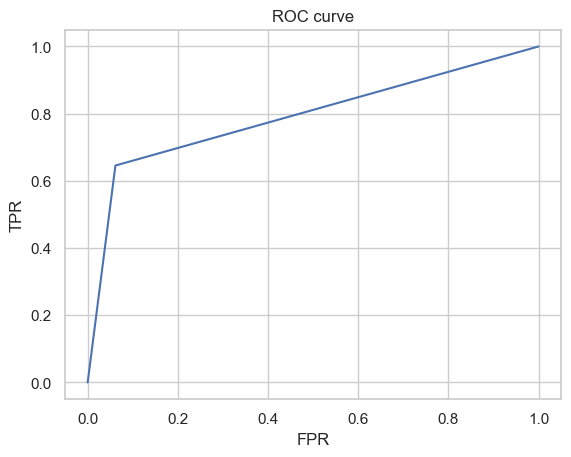

Classification Report:  Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       455
           1       0.82      0.52      0.64        79

    accuracy                           0.91       534
   macro avg       0.87      0.75      0.79       534
weighted avg       0.91      0.91      0.90       534

ROC_AUC_SCORE is  0.749603560995966


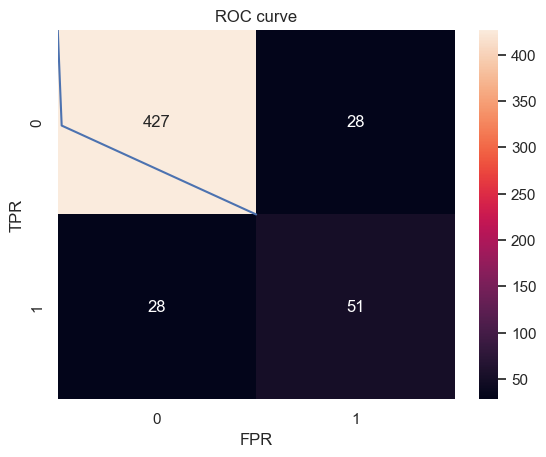

Classification Report:  XGBoost
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       455
           1       0.90      0.78      0.84        79

    accuracy                           0.96       534
   macro avg       0.93      0.88      0.91       534
weighted avg       0.95      0.96      0.95       534

ROC_AUC_SCORE is  0.8847127555988316


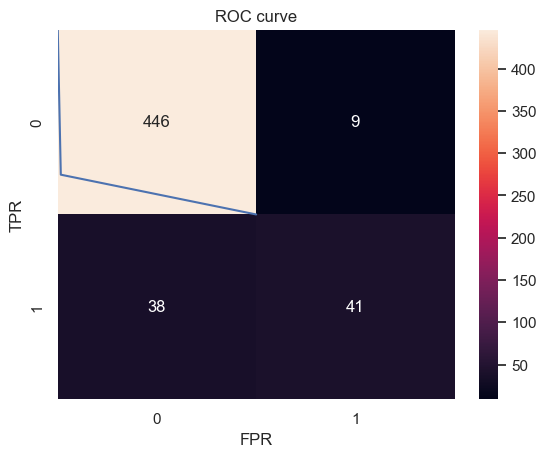

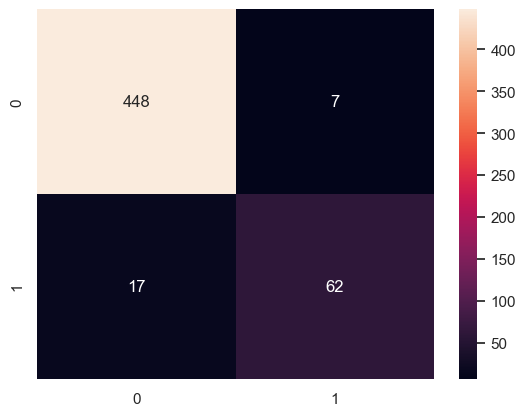

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, classification_report, roc_curve, confusion_matrix

models = {}

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Tree']  = DecisionTreeClassifier(random_state = seed)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(random_state = seed)

# XGBoost
from xgboost import XGBClassifier
models['XGBoost'] = XGBClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_train, y_train)

    # Prediction
    predictions = models[key].predict(X_val)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_val)
    precision[key] = precision_score(predictions, y_val)
    recall[key] = recall_score(predictions, y_val)
    Y_predict = models[key].predict(X_val)
    auc = roc_auc_score(y_val, Y_predict)
    print('Classification Report: ', key)
    print(classification_report(y_val, predictions))
    false_position_rate, true_position_rate, thresholds = roc_curve(y_val, predictions)
    print('ROC_AUC_SCORE is ', roc_auc_score(y_val, predictions))

    # fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_position_rate, true_position_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    sns.heatmap(confusion_matrix(y_val, predictions), fmt = '', annot = True)

### XGBOOST TO PREDICT "CHURN" OF "churn-bigml-20.csv"

In [37]:
X_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,International plan,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code 408,Area code 415,Area code 510
0,0,1,0,0,0,0,0,0,117,0,...,215.8,90,9.71,8.7,4,2.35,1,1.0,0.0,0.0
1,0,0,0,1,0,0,0,0,65,0,...,208.8,111,9.40,12.7,6,3.43,4,0.0,1.0,0.0
2,1,0,0,0,0,0,0,0,161,0,...,160.6,128,7.23,5.4,9,1.46,4,0.0,1.0,0.0
3,0,0,0,0,0,1,0,0,111,0,...,189.6,105,8.53,7.7,6,2.08,2,0.0,1.0,0.0
4,0,0,0,0,0,0,1,0,49,0,...,178.7,90,8.04,11.1,1,3.00,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,1,114,0,...,247.6,94,11.14,11.5,7,3.11,2,0.0,1.0,0.0
663,0,1,0,0,0,0,0,0,106,0,...,229.5,73,10.33,8.1,3,2.19,1,1.0,0.0,0.0
664,0,0,0,0,1,0,0,0,60,0,...,210.1,134,9.45,13.2,8,3.56,3,0.0,1.0,0.0
665,0,0,0,0,0,0,1,0,159,0,...,193.7,82,8.72,11.6,4,3.13,1,0.0,1.0,0.0


In [38]:
predic_y = models['XGBoost'].predict(X_test)

In [39]:
predic_y

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [40]:
submissionfile = pd.DataFrame({'Potability': predic_y})

In [41]:
submissionfile.to_csv('submissionfile.csv')

Compare the predicted results with the given "churn" values
=> 95% accuracy